<a href="https://colab.research.google.com/github/swetha-guggal/cvip_datascience_projects/blob/main/MobilePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Title: Mobile Price Prediction Model

Summary:

In this project, we aim to develop a mobile price prediction model that can accurately estimate the price of a mobile phone based on its specifications. By analyzing essential features such as RAM, camera quality, battery capacity, and brand, the model will provide users with reliable price predictions for various mobile phones.

Step 1: Data Collection
Obtain a dataset containing mobile phone specifications and their corresponding prices.  


Step 2: Data Preprocessing
Import necessary libraries, read the dataset, and explore the data to understand its structure and features.
Handle missing data and outliers, if any.
Encode categorical variables (e.g., brand) into numerical values using techniques like one-hot encoding or label encoding.
Split the dataset into features (X) and the target variable (y), where X contains mobile specifications, and y contains the mobile prices.


Step 3: Feature Selection and Engineering
Identify which features (specifications) are most relevant to predicting mobile prices. Feature selection can be done using techniques like correlation analysis, feature importance, or domain knowledge.
Engineer new features if necessary. For example, you can create a feature that combines the camera quality, battery capacity, and RAM to represent overall performance.


Step 4: Data Splitting
Split the dataset into training and testing sets. The training set will be used to train the model, and the testing set will be used to evaluate its performance.


Step 5: Model Selection
Choose a regression model suitable for this task. Common choices include Linear Regression, Decision Trees, Random Forest, Gradient Boosting, and Support Vector Machines.


Step 6: Model Training
Train the selected model using the training data (X_train, y_train).


Step 7: Model Evaluation
Evaluate the model's performance using appropriate regression metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score.






#importing necessary libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#uploading the dataset
data = pd.read_csv('/content/test.csv')
data

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
0,1043,1.8,14,5,0.1,193,3,16,226,1412,...,12,7,2,0,0,1,1,1,0,1
1,841,0.5,4,61,0.8,191,5,12,746,857,...,6,0,7,1,1,0,1,1,0,1
2,1807,2.8,1,27,0.9,186,3,4,1270,1366,...,17,10,10,0,0,1,0,1,1,1
3,1546,0.5,18,25,0.5,96,8,20,295,1752,...,10,0,7,1,1,1,1,0,0,0
4,1434,1.4,11,49,0.5,108,6,18,749,810,...,15,8,7,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1.9,0,54,0.5,170,7,17,644,913,...,14,8,15,1,1,1,0,1,0,1
996,609,1.8,0,13,0.9,186,4,2,1152,1632,...,8,1,19,0,0,1,1,0,1,0
997,1185,1.4,1,8,0.5,80,1,12,477,825,...,5,0,14,1,1,0,0,0,0,0
998,1533,0.5,0,50,0.4,171,2,12,38,832,...,15,11,6,0,0,1,1,1,0,1


In [ ]:
#shape of the data
data.shape

(1000, 21)

In [ ]:
#top 5 rows
data.head()

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
0,1043,1.8,14,5,0.1,193,3,16,226,1412,...,12,7,2,0,0,1,1,1,0,1
1,841,0.5,4,61,0.8,191,5,12,746,857,...,6,0,7,1,1,0,1,1,0,1
2,1807,2.8,1,27,0.9,186,3,4,1270,1366,...,17,10,10,0,0,1,0,1,1,1
3,1546,0.5,18,25,0.5,96,8,20,295,1752,...,10,0,7,1,1,1,1,0,0,0
4,1434,1.4,11,49,0.5,108,6,18,749,810,...,15,8,7,1,1,0,0,0,1,0


In [ ]:
#bottom rows
data.tail()

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
995,1700,1.9,0,54,0.5,170,7,17,644,913,...,14,8,15,1,1,1,0,1,0,1
996,609,1.8,0,13,0.9,186,4,2,1152,1632,...,8,1,19,0,0,1,1,0,1,0
997,1185,1.4,1,8,0.5,80,1,12,477,825,...,5,0,14,1,1,0,0,0,0,0
998,1533,0.5,0,50,0.4,171,2,12,38,832,...,15,11,6,0,0,1,1,1,0,1
999,1270,0.5,4,35,0.1,140,6,19,457,608,...,9,2,3,1,1,0,0,1,1,1


In [ ]:
#information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Battery_Power  1000 non-null   int64  
 1   Clock_Speed    1000 non-null   float64
 2   FC             1000 non-null   int64  
 3   Int_Memory     1000 non-null   int64  
 4   Mobile_D       1000 non-null   float64
 5   Mobile_W       1000 non-null   int64  
 6   Cores          1000 non-null   int64  
 7   PC             1000 non-null   int64  
 8   Pixel_H        1000 non-null   int64  
 9   Pixel_W        1000 non-null   int64  
 10  Ram            1000 non-null   int64  
 11  Screen_H       1000 non-null   int64  
 12  Screen_W       1000 non-null   int64  
 13  Talk_Time      1000 non-null   int64  
 14  Four_G         1000 non-null   int64  
 15  Three_G        1000 non-null   int64  
 16  Touch_Screen   1000 non-null   int64  
 17  Dual_SIM       1000 non-null   int64  
 18  Bluetooth

In [ ]:
#dataset columns
data.columns

Index(['Battery_Power', 'Clock_Speed', 'FC', 'Int_Memory', 'Mobile_D',
       'Mobile_W', 'Cores', 'PC', 'Pixel_H', 'Pixel_W', 'Ram', 'Screen_H',
       'Screen_W', 'Talk_Time', 'Four_G', 'Three_G', 'Touch_Screen',
       'Dual_SIM', 'Bluetooth', 'WiFi', 'Price_Range'],
      dtype='object')

In [ ]:
#datatyprs of features
data.dtypes

Battery_Power      int64
Clock_Speed      float64
FC                 int64
Int_Memory         int64
Mobile_D         float64
Mobile_W           int64
Cores              int64
PC                 int64
Pixel_H            int64
Pixel_W            int64
Ram                int64
Screen_H           int64
Screen_W           int64
Talk_Time          int64
Four_G             int64
Three_G            int64
Touch_Screen       int64
Dual_SIM           int64
Bluetooth          int64
WiFi               int64
Price_Range        int64
dtype: object

In [ ]:
#statistical observations
data.describe()

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1248.510000,1.540900,4.593000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,...,11.995000,5.316000,11.085000,0.487000,0.756000,0.50000,0.517000,0.516000,0.507000,0.516000
std,432.458227,0.829268,4.463325,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,...,4.320607,4.240062,5.497636,0.500081,0.429708,0.50025,0.499961,0.499994,0.500201,0.499994
min,500.000000,0.500000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,...,5.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,895.000000,0.700000,1.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,...,8.000000,2.000000,6.750000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1246.500000,1.500000,3.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,...,12.000000,5.000000,11.000000,0.000000,1.000000,0.50000,1.000000,1.000000,1.000000,1.000000
75%,1629.250000,2.300000,7.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,...,16.000000,8.000000,16.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
max,1999.000000,3.000000,19.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,...,19.000000,18.000000,20.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


Count: There are 1000 data points in the dataset, indicating the number of mobile phones.

Mean: The "mean" row shows the average value for each column. For example, the average battery power is approximately 1248.51.

Std: The "std" row represents the standard deviation for each column, indicating the amount of variation or dispersion in the data. For example, the standard deviation of battery power is approximately 432.46.

Min: This row displays the minimum value observed in each column. For instance, the minimum battery power in the dataset is 500.

25%: The 25th percentile (Q1) marks the value below which 25% of the data falls. It provides insight into the lower quartile of the data distribution.

50%: The 50th percentile (median or Q2) is the middle value of the dataset. It separates the data into two halves, where half the data falls below and half above this value.

75%: The 75th percentile (Q3) indicates the value below which 75% of the data falls. It represents the upper quartile of the data distribution.

Max: The "max" row displays the maximum value observed in each column. For instance, the maximum battery power in the dataset is 1999.

These statistics provide an overview of the central tendency, spread, and distribution of the data for each attribute in the dataset. These are useful for understanding the dataset's characteristics and identifying potential outliers.









#cheking for null values

In [ ]:
data.isnull().sum()

Battery_Power    0
Clock_Speed      0
FC               0
Int_Memory       0
Mobile_D         0
Mobile_W         0
Cores            0
PC               0
Pixel_H          0
Pixel_W          0
Ram              0
Screen_H         0
Screen_W         0
Talk_Time        0
Four_G           0
Three_G          0
Touch_Screen     0
Dual_SIM         0
Bluetooth        0
WiFi             0
Price_Range      0
dtype: int64

In [ ]:
#checking for duplicates
data.duplicated().any()

False

In [ ]:
#Duplicate Values

# Dataset Duplicate Value Count
len(data[data.duplicated()])


0

In [ ]:
#Missing Values/Null Values

# Missing Values/Null Values Count
print(data.isnull().sum())


Battery_Power    0
Clock_Speed      0
FC               0
Int_Memory       0
Mobile_D         0
Mobile_W         0
Cores            0
PC               0
Pixel_H          0
Pixel_W          0
Ram              0
Screen_H         0
Screen_W         0
Talk_Time        0
Four_G           0
Three_G          0
Touch_Screen     0
Dual_SIM         0
Bluetooth        0
WiFi             0
Price_Range      0
dtype: int64


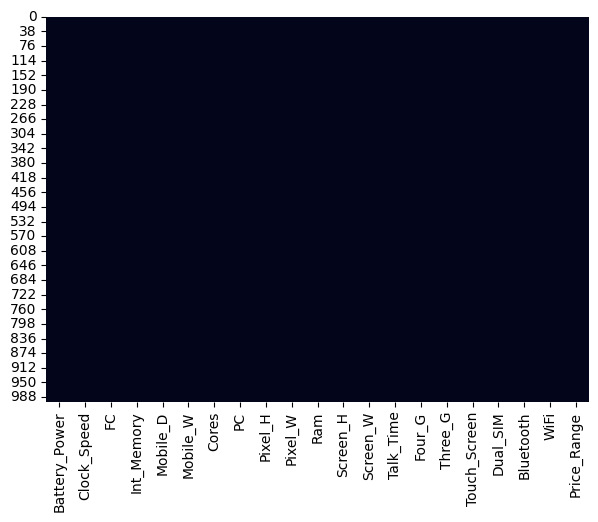

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

What did you know about your dataset?
1.The given dataset from competitive mobile market companies, and we do not have to predict the actual price but a price range indicating how high the price is.

2.Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that consumers find it appropriate to buy the product.

3.The above dataset has 1000 rows and 21 columns. There are no mising values and duplicate values in the dataset.

Variables Description
Battery_power : Total energy a battery can store in one time measured in mAh

Blue : Has bluetooth or not

Clock_speed : speed at which microprocessor executes instructions

Dual_sim : Has dual sim support or not

Fc : Front Camera mega pixels

Four_g : Has 4G or not

Int_memory : Internal Memory in Gigabytes

M_dep : Mobile Depth in cm

Mobile_wt : Weight of mobile phone

N_cores : Number of cores of processor

Pc : Primary Camera mega pixels

Px_height : Pixel Resolution Height

Px_width : Pixel Resolution Width

Ram : Random Access Memory in Mega
Touch_screen : Has touch screen or not

Wifi : Has wifi or not

Sc_h : Screen Height of mobile in cm

Sc_w : Screen Width of mobile in cm

Talk_time : longest time that a single battery charge will last when you are

Three_g : Has 3G or not

Wifi : Has wifi or not

Price_range : This is the target variable with value of 0(low cost), (medium cost),2(high cost) and 3(very high cost).


In [ ]:
#Check Unique Values for each variable.

# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("No. of unique values in ",i,"is",data[i].nunique(),".")

No. of unique values in  Battery_Power is 721 .
No. of unique values in  Clock_Speed is 26 .
No. of unique values in  FC is 20 .
No. of unique values in  Int_Memory is 63 .
No. of unique values in  Mobile_D is 10 .
No. of unique values in  Mobile_W is 121 .
No. of unique values in  Cores is 8 .
No. of unique values in  PC is 21 .
No. of unique values in  Pixel_H is 694 .
No. of unique values in  Pixel_W is 743 .
No. of unique values in  Ram is 872 .
No. of unique values in  Screen_H is 15 .
No. of unique values in  Screen_W is 19 .
No. of unique values in  Talk_Time is 19 .
No. of unique values in  Four_G is 2 .
No. of unique values in  Three_G is 2 .
No. of unique values in  Touch_Screen is 2 .
No. of unique values in  Dual_SIM is 2 .
No. of unique values in  Bluetooth is 2 .
No. of unique values in  WiFi is 2 .
No. of unique values in  Price_Range is 2 .


In [ ]:
# Create a copy of the current dataset and assigning to df
df=data.copy()

# Checking mobile belongs to price range 0
print("No of mobile belongs to price_range 0 is :",len(df[df['Price_Range']==0]))

# Checking mobile belongs to price range 1
print("No of mobile belongs to price_range 1 is :",len(df[df['Price_Range']==1]))



No of mobile belongs to price_range 0 is : 484
No of mobile belongs to price_range 1 is : 516


In [ ]:
# show value counts
df['Price_Range'].value_counts()


1    516
0    484
Name: Price_Range, dtype: int64

In [ ]:
# Mobile phones groupby 4g support and not supports
df.groupby('Four_G')['Price_Range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,Four_G,Price_Range,Count
0,0,1,265
2,1,1,251
1,0,0,248
3,1,0,236


In [ ]:
# Mobile phones groupby 3g support and not supports
df.groupby('Three_G')['Price_Range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,Three_G,Price_Range,Count
2,1,1,393
3,1,0,363
0,0,1,123
1,0,0,121


In [ ]:
#Mobile phones groupby blue support and not supports
df.groupby('Dual_SIM')['Price_Range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,Dual_SIM,Price_Range,Count
2,1,1,264
3,1,0,253
0,0,1,252
1,0,0,231


In [ ]:
# Mobile phones groupby touch screen support and not supports
df.groupby('Touch_Screen')['Price_Range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,Touch_Screen,Price_Range,Count
0,0,1,273
2,1,0,257
3,1,1,243
1,0,0,227


In [ ]:
# Pixels count
df['px_count'] = df['Pixel_W']*df['Pixel_H']


In [ ]:
# Mobile phones groupby touch screen support and not supports
df.groupby('Touch_Screen')['Price_Range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,Touch_Screen,Price_Range,Count
0,0,1,273
2,1,0,257
3,1,1,243
1,0,0,227


In [ ]:
# show price range with descreasing pixel count values
df.sort_values(["px_count"],ascending=False)[ ['Price_Range', 'px_count'] ].head(10)

,Price_Range,px_count
459,0,3722100
529,1,3652263
940,0,3644277
688,0,3570290
183,0,3492432
129,1,3481272
611,0,3394104
56,1,3392123
604,1,3372168
461,0,3371653


In [ ]:
df

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range,px_count
0,1043,1.8,14,5,0.1,193,3,16,226,1412,...,7,2,0,0,1,1,1,0,1,319112
1,841,0.5,4,61,0.8,191,5,12,746,857,...,0,7,1,1,0,1,1,0,1,639322
2,1807,2.8,1,27,0.9,186,3,4,1270,1366,...,10,10,0,0,1,0,1,1,1,1734820
3,1546,0.5,18,25,0.5,96,8,20,295,1752,...,0,7,1,1,1,1,0,0,0,516840
4,1434,1.4,11,49,0.5,108,6,18,749,810,...,8,7,1,1,0,0,0,1,0,606690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1.9,0,54,0.5,170,7,17,644,913,...,8,15,1,1,1,0,1,0,1,587972
996,609,1.8,0,13,0.9,186,4,2,1152,1632,...,1,19,0,0,1,1,0,1,0,1880064
997,1185,1.4,1,8,0.5,80,1,12,477,825,...,0,14,1,1,0,0,0,0,0,393525
998,1533,0.5,0,50,0.4,171,2,12,38,832,...,11,6,0,0,1,1,1,0,1,31616


#EDA

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()

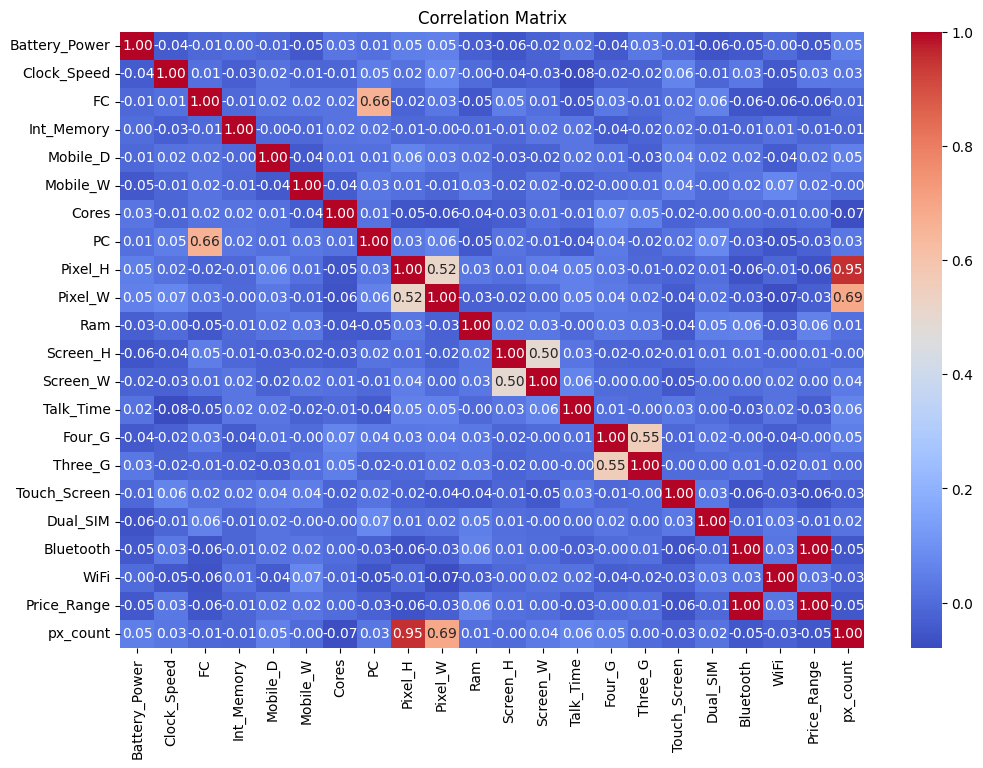

In [ ]:
# Data distribution and visualization
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

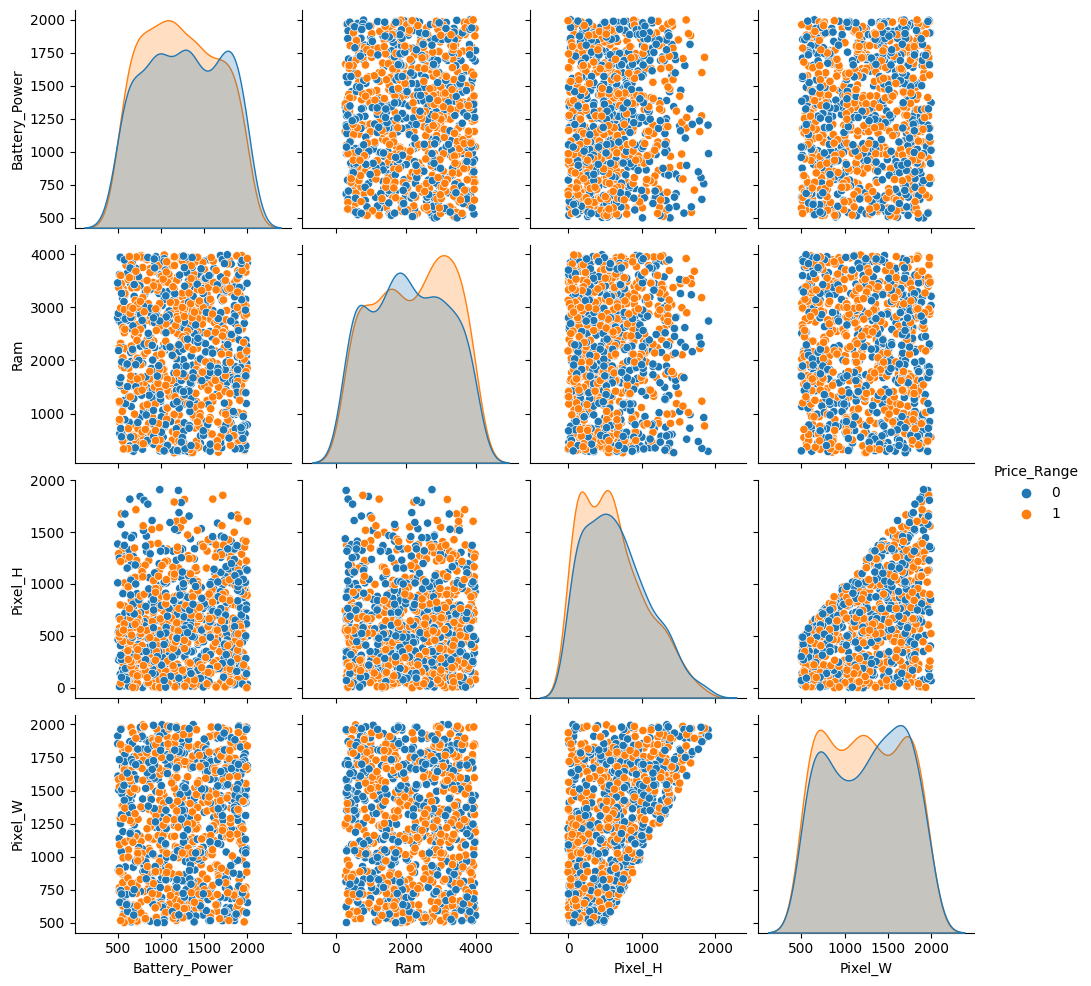

In [ ]:
# Pairplot for selected columns (replace with your chosen columns)
selected_columns = ['Battery_Power', 'Ram', 'Pixel_H', 'Pixel_W', 'Price_Range']
sns.pairplot(df[selected_columns], hue='Price_Range')
plt.show()

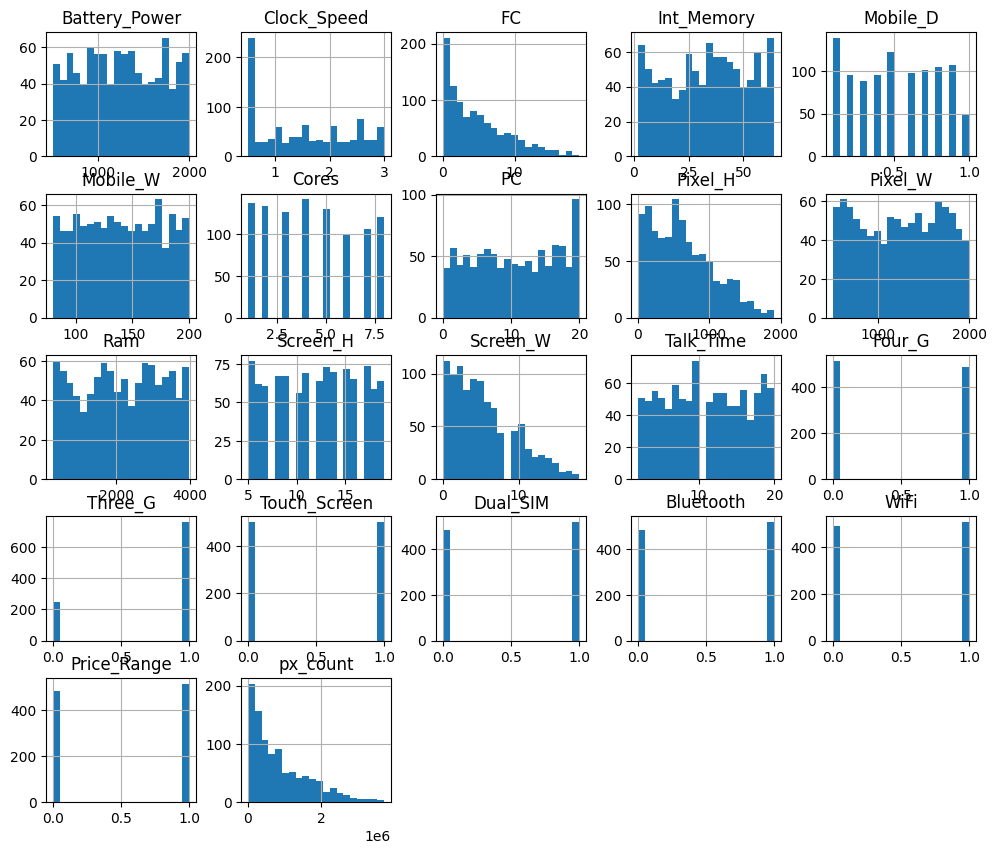

In [ ]:
# Histograms for numerical features
df.hist(bins=20, figsize=(12, 10))
plt.show()


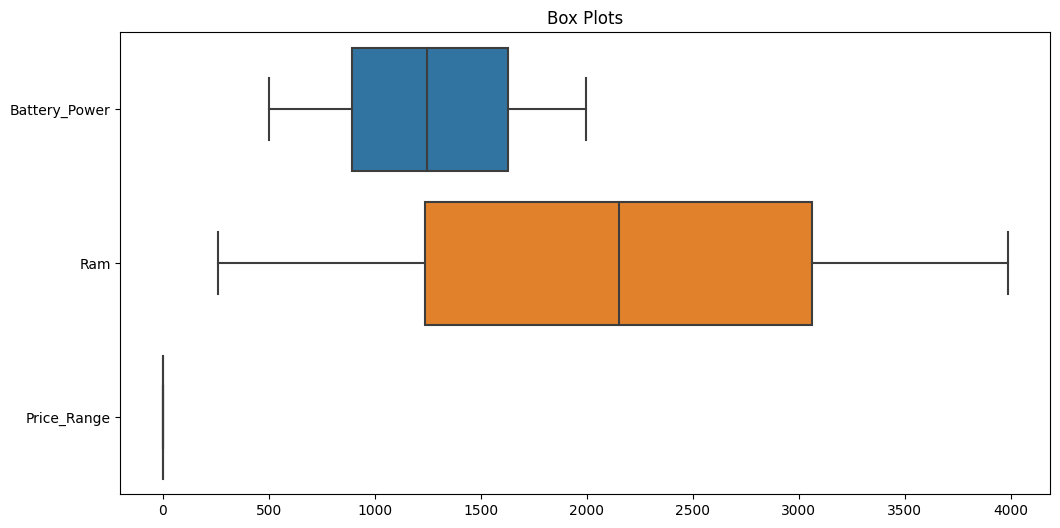

In [ ]:
# Box plots for selected columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Battery_Power', 'Ram', 'Price_Range']], orient='h')
plt.title("Box Plots")
plt.show()


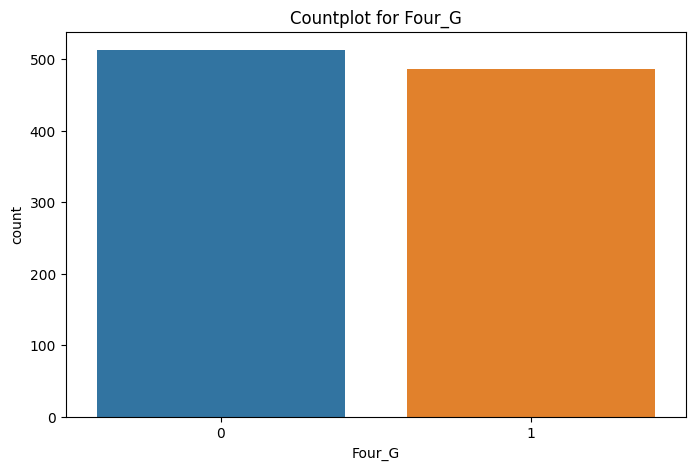

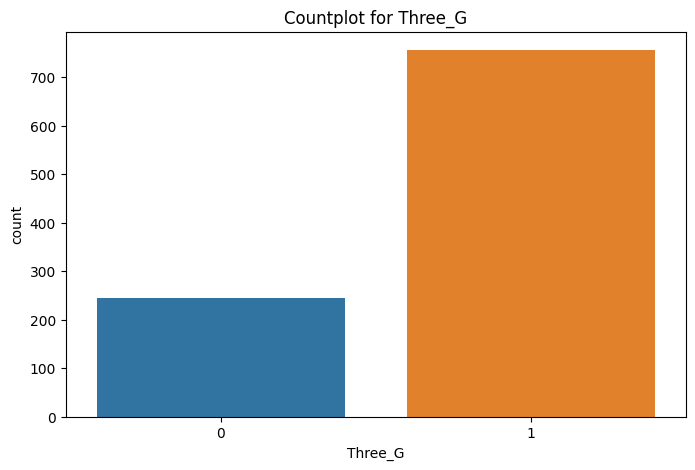

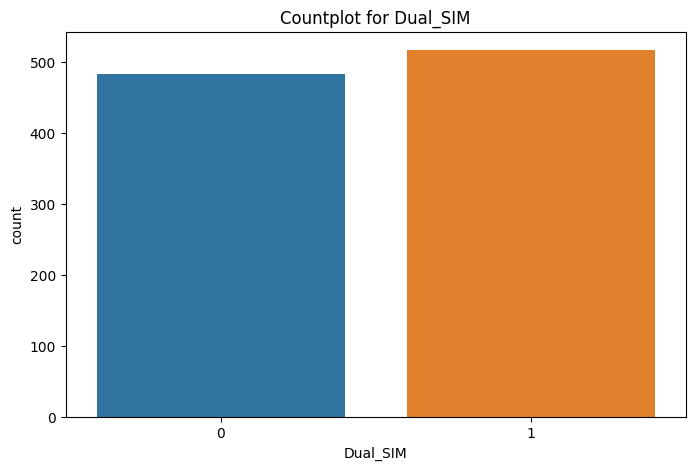

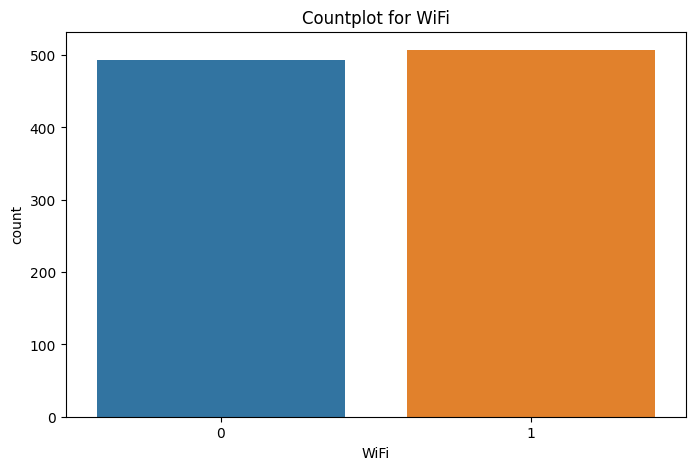

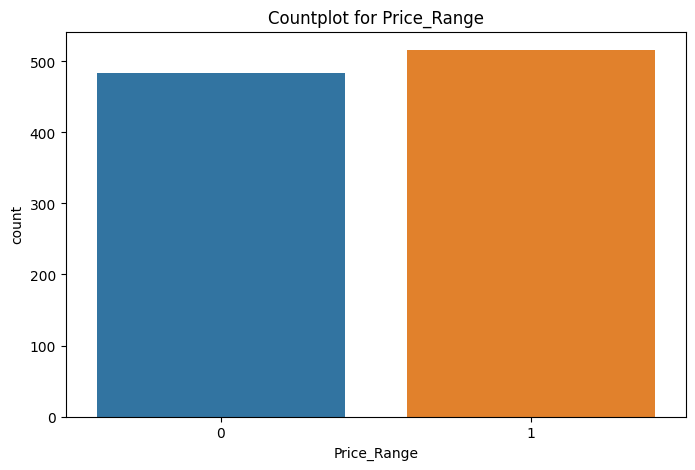

In [ ]:
# Countplot for categorical features (replace with your categorical columns)
categorical_columns = ['Four_G', 'Three_G', 'Dual_SIM', 'WiFi', 'Price_Range']
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot for {col}")
    plt.show()

In [ ]:
# Summary statistics
summary = df.describe()


In [ ]:
# Summary statistics
print("Summary Statistics:")
print(summary)

Summary Statistics:
       Battery_Power  Clock_Speed           FC   Int_Memory     Mobile_D  \
count    1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     1248.510000     1.540900     4.593000    33.652000     0.517500   
std       432.458227     0.829268     4.463325    18.128694     0.280861   
min       500.000000     0.500000     0.000000     2.000000     0.100000   
25%       895.000000     0.700000     1.000000    18.000000     0.300000   
50%      1246.500000     1.500000     3.000000    34.500000     0.500000   
75%      1629.250000     2.300000     7.000000    49.000000     0.800000   
max      1999.000000     3.000000    19.000000    64.000000     1.000000   

         Mobile_W        Cores           PC      Pixel_H      Pixel_W  ...  \
count  1000.00000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean    139.51100     4.328000    10.054000   627.121000  1239.774000  ...   
std      34.85155     2.288155     6.095099   432.929699   43

In [ ]:
# Correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               Battery_Power  Clock_Speed        FC  Int_Memory  Mobile_D  \
Battery_Power       1.000000    -0.039075 -0.007846    0.003751 -0.009065   
Clock_Speed        -0.039075     1.000000  0.010127   -0.030487  0.016995   
FC                 -0.007846     0.010127  1.000000   -0.006565  0.020859   
Int_Memory          0.003751    -0.030487 -0.006565    1.000000 -0.004386   
Mobile_D           -0.009065     0.016995  0.020859   -0.004386  1.000000   
Mobile_W           -0.047065    -0.014107  0.018353   -0.010447 -0.041994   
Cores               0.025732    -0.012247  0.020828    0.021601  0.010062   
PC                  0.012847     0.047469  0.659338    0.022682  0.012663   
Pixel_H             0.048647     0.017277 -0.017982   -0.009564  0.062559   
Pixel_W             0.053365     0.070585  0.030550   -0.003877  0.034861   
Ram                -0.032366    -0.000650 -0.051997   -0.007107  0.018349   
Screen_H           -0.055665    -0.039503  0.045158   -

#Machine Learning Approach

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



# Split data into features (X) and target variable (y)
X = df.drop('Price_Range', axis=1)
y = df['Price_Range']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_y_pred = decision_tree.predict(X_test)

# Initialize and train the Random Forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_y_pred = random_forest.predict(X_test)

# Initialize and train the Support Vector Machine (SVM) classifier
svm = SVC()
svm.fit(X_train, y_train)
svm_y_pred = svm.predict(X_test)

# Initialize and train the K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

# Initialize and train the Logistic Regression classifier
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
logistic_regression_y_pred = logistic_regression.predict(X_test)

# Accuracy scores
decision_tree_accuracy = accuracy_score(y_test, decision_tree_y_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_y_pred)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_y_pred)

# Precision scores
decision_tree_precision = precision_score(y_test, decision_tree_y_pred, average='micro')
random_forest_precision = precision_score(y_test, random_forest_y_pred, average='micro')
svm_precision = precision_score(y_test, svm_y_pred, average='micro')
knn_precision = precision_score(y_test, knn_y_pred, average='micro')
logistic_regression_precision = precision_score(y_test, logistic_regression_y_pred, average='micro')

# Confusion matrices
decision_tree_confusion = confusion_matrix(y_test, decision_tree_y_pred)
random_forest_confusion = confusion_matrix(y_test, random_forest_y_pred)
svm_confusion = confusion_matrix(y_test, svm_y_pred)
knn_confusion = confusion_matrix(y_test, knn_y_pred)
logistic_regression_confusion = confusion_matrix(y_test, logistic_regression_y_pred)

# Print results
print("Decision Tree:")
print(f"Train Accuracy: {decision_tree_accuracy:.2f}")
print(f"True Call Precision: {decision_tree_precision:.2f}")
print("Confusion Matrix:")
print(decision_tree_confusion)
print()

print("Random Forest:")
print(f"Train Accuracy: {random_forest_accuracy:.2f}")
print(f"True Call Precision: {random_forest_precision:.2f}")
print("Confusion Matrix:")
print(random_forest_confusion)
print()

print("Support Vector Machine:")
print(f"Train Accuracy: {svm_accuracy:.2f}")
print(f"True Call Precision: {svm_precision:.2f}")
print("Confusion Matrix:")
print(svm_confusion)
print()

print("K-Nearest Neighbors:")
print(f"Train Accuracy: {knn_accuracy:.2f}")
print(f"True Call Precision: {knn_precision:.2f}")
print("Confusion Matrix:")
print(knn_confusion)
print()

print("Logistic Regression:")
print(f"Train Accuracy: {logistic_regression_accuracy:.2f}")
print(f"True Call Precision: {logistic_regression_precision:.2f}")
print("Confusion Matrix:")
print(logistic_regression_confusion)


Decision Tree:
Train Accuracy: 1.00
True Call Precision: 1.00
Confusion Matrix:
[[ 95   0]
 [  0 105]]

Random Forest:
Train Accuracy: 1.00
True Call Precision: 1.00
Confusion Matrix:
[[ 95   0]
 [  0 105]]

Support Vector Machine:
Train Accuracy: 0.48
True Call Precision: 0.48
Confusion Matrix:
[[33 62]
 [41 64]]

K-Nearest Neighbors:
Train Accuracy: 0.53
True Call Precision: 0.53
Confusion Matrix:
[[51 44]
 [50 55]]

Logistic Regression:
Train Accuracy: 0.47
True Call Precision: 0.47
Confusion Matrix:
[[44 51]
 [54 51]]


Decision Tree:

Train Accuracy: 1.00
True Call Precision: 1.00
Confusion Matrix:

[[ 95   0]
 [  0 105]]
Random Forest:

Train Accuracy: 1.00
True Call Precision: 1.00
Confusion Matrix:

[[ 95   0]
 [  0 105]]
Support Vector Machine (SVM):

Train Accuracy: 0.48
True Call Precision: 0.48
Confusion Matrix:

[[33 62]
 [41 64]]
K-Nearest Neighbors (KNN):

Train Accuracy: 0.53
True Call Precision: 0.53
Confusion Matrix:

[[51 44]
 [50 55]]
Logistic Regression:

Train Accuracy: 0.47
True Call Precision: 0.47
Confusion Matrix:

[[44 51]
 [54 51]]


In summary, both Decision Tree and Random Forest achieved perfect accuracy and precision, while SVM, KNN, and Logistic Regression showed lower accuracy and precision values. It's important to note that Decision Tree and Random Forest are overfitting the training data since they achieve 100% accuracy, which might not generalize well to unseen data. SVM, KNN, and Logistic Regression have lower accuracy and precision, indicating that they may not perform as well on this dataset. Additional tuning and optimization may be required for these models.

